In [1]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import face_recognition
import os
from imutils import paths

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

I found 5 face(s) in this photograph.


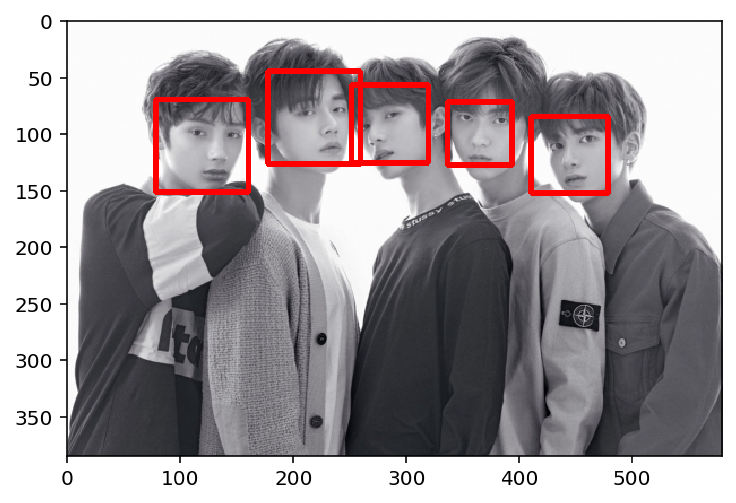

In [2]:
img = cv2.imread("../2020.01.30/face2.jpg")
face_locations = face_recognition.face_locations(img, model="cnn")
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

---

In [3]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("../2020.01.30/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()  # Returns the default face detector

In [34]:
frame = cv2.imread("../2020.01.30/face.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 얼굴은 흑백으로해도 충분히 찾아짐
rects = detector(gray, 0) # 0이 뭔지는 잘 모르겠으나.... 거의 디폴트처럼 쓰는 듯? 생략도 가능
print("Number of faces detected: {}".format(len(rects)))

# 다음의 결과에 의해서, rects의 성분들인 사각형들은 [(left, top), (right, bottom)]로 출력된다는 것을 알 수 있음
for r in rects :
    x1 = r.left()
    y1 = r.top()
    x2 = r.right()
    y2 = r.bottom()
    print(x1,y1,x2,y2)
    print(r)

Number of faces detected: 1
37 79 162 203
[(37, 79) (162, 203)]


[(37, 79) (162, 203)]




68


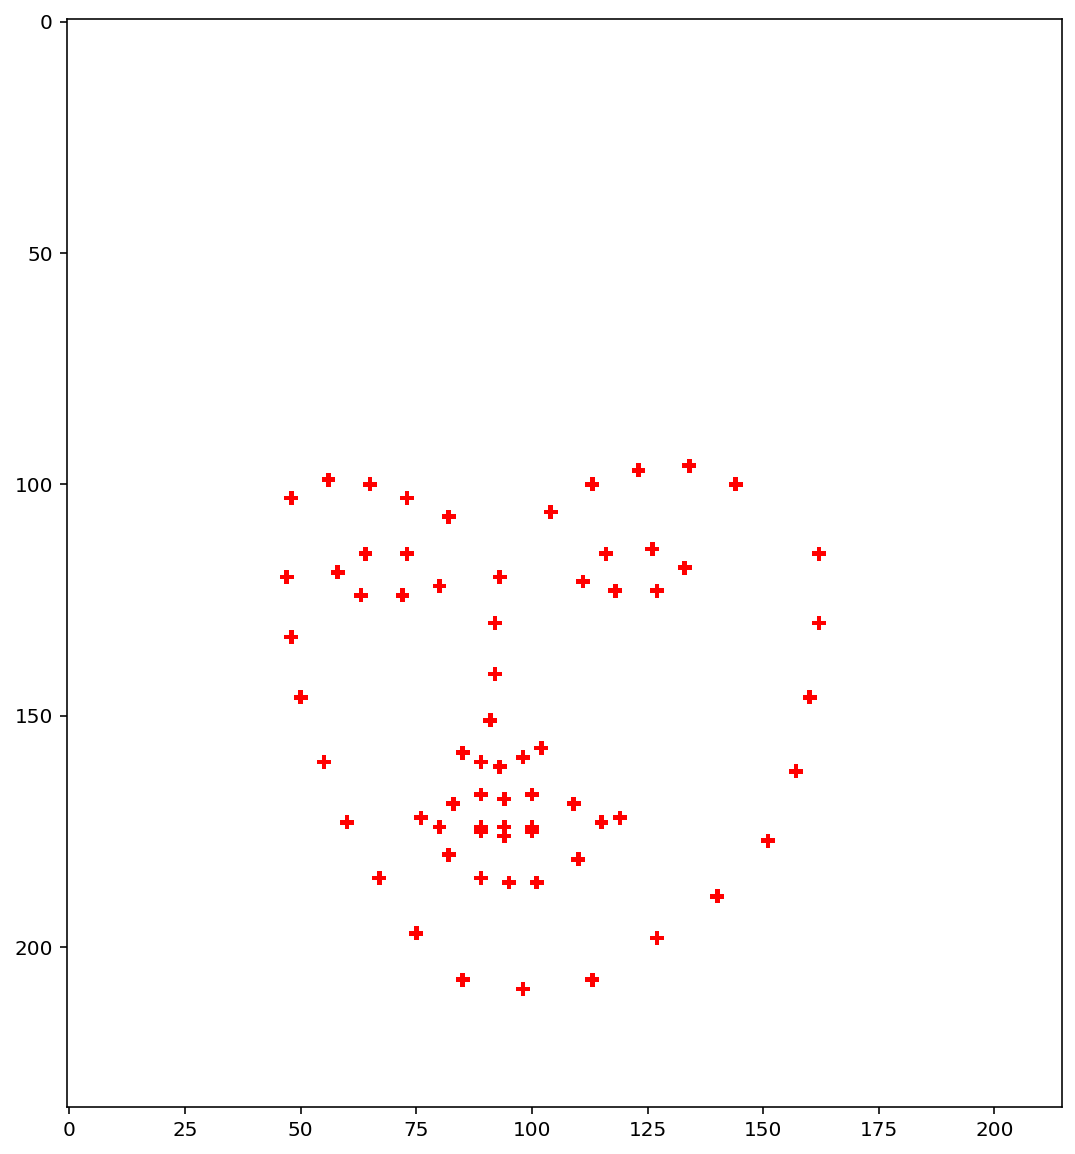

In [46]:
print(rects[0])  # [(left, top), (right, bottom)] 출력
print('\n')

shape = predictor(gray, rects[0])
print(shape) # 이렇게하면 알 수가 없음
print('\n')


shape2 = face_utils.shape_to_np(shape)
# print(shape2) # 위의 shape를 알아볼 수 있게 바꿔줌으로써 얼굴의 모든 랜드마크를 다 좌표로 바꿈
print(len(shape2)) # 랜드마크 개수 확인



img2 = np.zeros(frame.shape, 'uint8')  # frame과 같은 크기의 흰 도화지 만들기
img2[:,:] = [255,255,255]

## facial landmark를 빨간색 점으로 찍어서 표현
for j in range(68):
    x, y = shape.part(j).x, shape.part(j).y
#     x, y = shape2[j][0], shape2[j][1]  바로 윗 줄이랑 같은 표현임
    cv2.circle(img2, (x, y), 1, (0, 0, 255), -1)

    
## 얼굴이 있는 부분을 박스쳐주기
#     cv2.rectangle(gray, (rects[0].left(), rects[0].top()), 
#                   (rects[0].right(), rects[0].bottom()), (0, 255, 0), 2)

fig=plt.figure(figsize=(15,10))
imshow("",img2)
plt.show()

<img src=facial_landmarks_68markup-768x619.jpg width=400>

Detection : 0 --- Left : 37, Top : 79, Right : 162, Bottom : 203


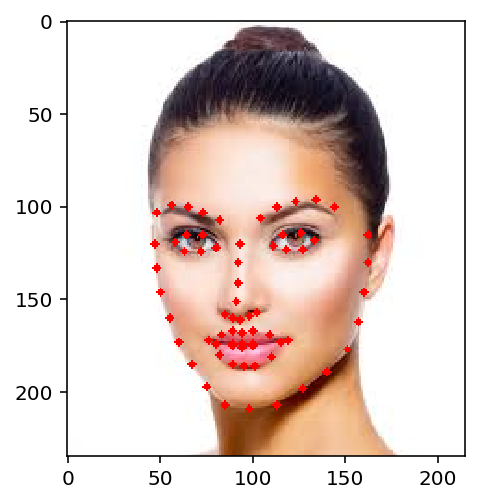

In [50]:
for k, d in enumerate(rects):
        print("Detection : {} --- Left : {}, Top : {}, Right : {}, Bottom : {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape) # 얼굴의 구체적인 특징점 찾기
        for (x, y) in shape:
          cv2.circle(frame, (x, y), 2, (0, 0, 255), -1)
        
imshow("", frame)

[68, 119, 121, 119]


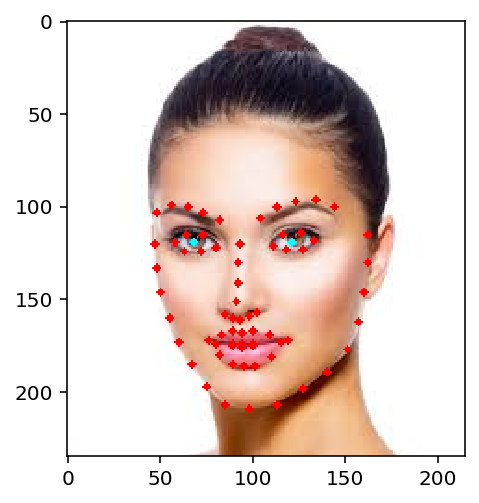

In [51]:
# 눈동자 선택
eyel = np.mean(shape[36:42], axis=0) # 위의 그림에서 37번부터 42번까지이므로 인덱스 36~41까지를 선택
eyer = np.mean(shape[42:48], axis=0) # 위의 그림에서 43번부터 48번까지이므로 인덱스 42~47까지를 선택
cv2.circle(frame, (int(eyel[0]), int(eyel[1])), 2,(255,255,0), -1)
cv2.circle(frame, (int(eyer[0]), int(eyer[1])), 2,(255,255,0), -1)

print([int(eyel[0]), int(eyel[1]), int(eyer[0]), int(eyer[1])])
imshow("", frame)

In [53]:
cv2.imwrite("face_out2.jpg", frame)

True

---

### 여러 얼굴 중에 내 얼굴이 어디에 가장 가까운지 찾기(faces폴더에 하위폴더 없는 경우에만!!)

In [41]:
img = face_recognition.load_image_file("../2020.01.30/face.jpg")

# Given an image, return the 128-dimension face encoding for each face in the image.
face_encoding = face_recognition.face_encodings(img)

# print(face_encoding)
print(face_encoding[0].shape) 

(128,)


In [92]:
files = os.listdir("faces")   
    
known_face_encodings = []
known_face_names = []

for filename in files:
            name, ext = os.path.splitext(filename)
            if ext == '.jpg':
                known_face_names.append(name)
                pathname = os.path.join("faces", filename)
                img = face_recognition.load_image_file(pathname)
                face_encoding = face_recognition.face_encodings(img)[0]
                known_face_encodings.append(face_encoding) 


In [94]:
# 딱 faces폴더 안에 있고 그 안에 하위폴더에 담지 말아야 함

print(known_face_names)
print(known_face_encodings[0])


[]


IndexError: list index out of range

In [70]:
# 내 사진이 과연 어느 얼굴에 제일 가까운지.... 여기선 파일명만 리턴함
test = face_recognition.load_image_file("../2020.01.30/me.jpg")
img = cv2.imread("../2020.01.30/me.jpg")

face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(img, face_locations)

face_name = []
for face_encoding in face_encodings :
    
    distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    print(distances)
    min_value = min(distances)
    
    name = "Unknown"
    if min_value <0.6:
        index = np.argmin(distances)
        name = known_face_names[index]
print(name)


[0.66512188 0.78981656 0.51683275 0.51172822 0.5045564  0.51963641
 0.57219539]
5


---

In [95]:
imagePaths = list(paths.list_images("faces"))  # faces폴더에 있는 이미지를 한 번씩 다 돈다 # 실제 경로명들을 담은 리스트
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-2]  # os.path.sep는 경로를 하나하나 나눌때 쓰는 \\로 imagePath에서 \\를 다 뗀 것들 중 -2번째 리턴함
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)
        
#list, dictionary등을 그대로 저장하면 용량이 매우 커지는데 pickle을 사용하면 binary형태로 저장되기 때문에 용량이 매우 작아진다.
import pickle 
data = {"encodings": knownEncodings, "names": knownNames}   # 이번엔 파일로저장을 할 것임 # dictionary형태로 저장 가능
f = open("known.bin", "wb")   # known.bin이라는 파일이 원래는 없었음... 근데 "wb"모드라는 옵션을 실행함으로써 write binary가 되어서 저장이 됌
f.write(pickle.dumps(data))
f.close()

bad   -   faces\bad\bad1.jpg
bad   -   faces\bad\bad2.jpg
bad   -   faces\bad\bad3.jpg
bad   -   faces\bad\bad4.jpg
bad   -   faces\bad\bad5.jpg
good   -   faces\good\good1.jpg
good   -   faces\good\good2.jpg
good   -   faces\good\good3.jpg
good   -   faces\good\good4.jpg
good   -   faces\good\good5.jpg
good   -   faces\good\good6.jpg
good   -   faces\good\good7.jpg
normal   -   faces\normal\bad6.jpg
normal   -   faces\normal\normal1.jpg
normal   -   faces\normal\normal2.jpg
normal   -   faces\normal\normal3.jpg
normal   -   faces\normal\normal4.jpg
normal   -   faces\normal\normal5.jpg


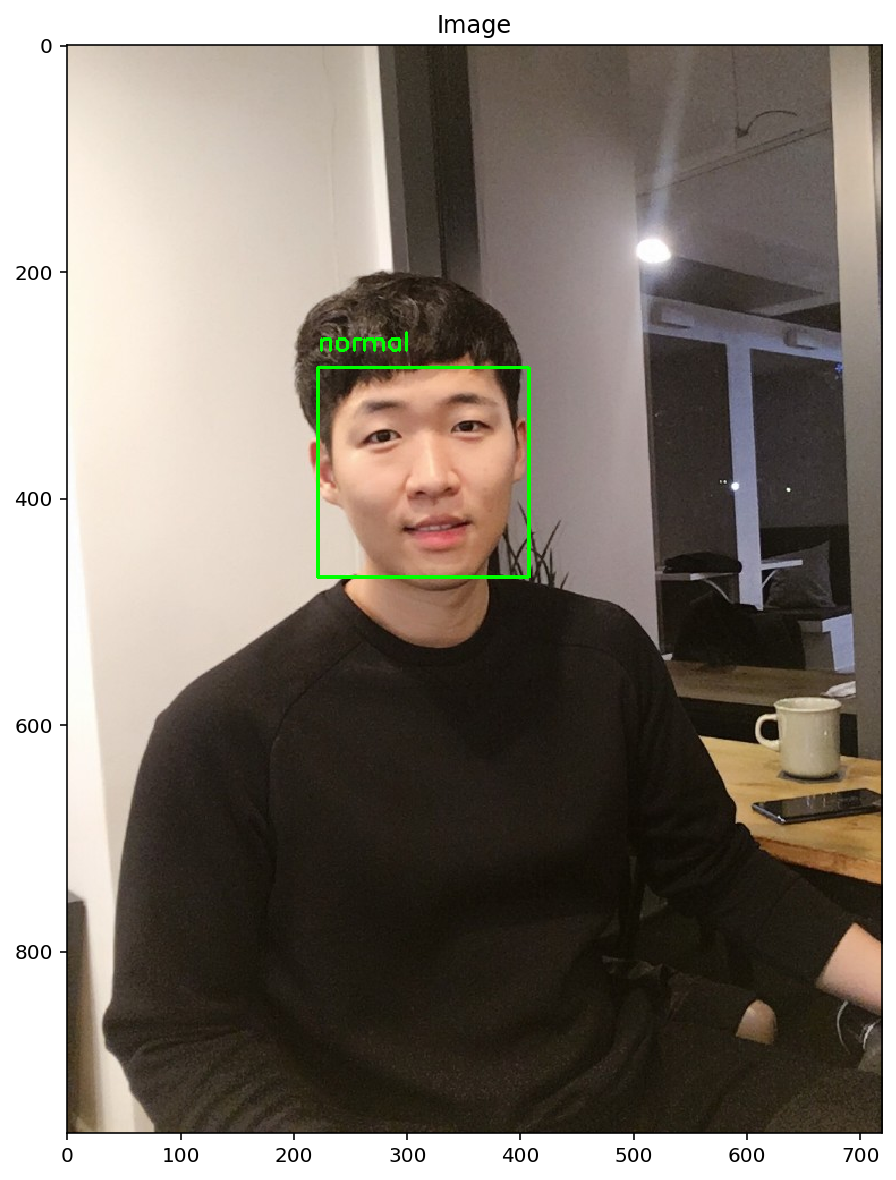

In [96]:
data = pickle.loads(open("known.bin", "rb").read()) #'rb'는 read binary라는 옵션값
 
image = cv2.imread("../2020.01.30/me.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding) # 위의 예제에서 썼던 distance보다 더 강력한 것으로 비교하는 것!
    name = "Unknown"
    if True in matches:     # 나랑 닮은 이미지 파일들의 encoding 정보로부터 data["names"]라는 정보(column)을 담음
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
fig=plt.figure(figsize=(20,10))
imshow("Image", image)
plt.show()

In [98]:
encoding=encodings[0]
matches = face_recognition.compare_faces(data["encodings"], encoding)
print(matches)

matchedIdxs = [i for (i, b) in enumerate(matches) if b]
print(matchedIdxs)

for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
            
# name = data["names"][11]
print(data["names"])
# print(name)

print(counts["bad"])
print(counts["normal"])
print(counts["good"])
# counts["song"] = 2
# counts["obama"] = 1


# a= {}
# a["hello"]  # "hello"가 정의되어 있지 않으면 에러가 뜸
# print(a.get('hello', 0))  # 'hello'가 정의되어 있지 않으면 0으로 출력함


[False, False, False, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True]
[3, 4, 5, 6, 11, 12, 13, 14, 15, 16, 17]
['bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal']
6
18
9


In [71]:
feature = np.array(data["encodings"])
print(feature.shape)

(7, 128)


In [87]:
import pandas as pd
c = pd.factorize(data["names"])
print(c)
label = c[0]
print(label)

(array([0, 0, 0, 0, 0, 0, 0], dtype=int64), array(['faces'], dtype=object))
[0 0 0 0 0 0 0]
